# Data Preprocessing

In [1]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_converted_folder = os.path.join(fp_processed_folder, "converted_to_csv")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_concatenated_file = os.path.join(fp_downsampled_folder, "concatenated.csv")
fp_downsampled_continuous_file = os.path.join(fp_downsampled_folder, "continous.csv")
fp_downsampled_continuous_ae_file = os.path.join(fp_downsampled_folder, "continous_ae.csv")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")
fp_downsampled_scaler_file = os.path.join(fp_downsampled_folder, "scaler.pkl")
fp_fields_file = os.path.join(fp_converted_folder, "fields.csv")

In [2]:
# Get fields file to analyse
fields_df = pd.read_csv(fp_fields_file, quoting=csv.QUOTE_NONE, escapechar='/', index_col=0)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n
...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n


In [3]:
def add_feat_names(fields_df):
    feat_names = []
    for i in range(len(fields_df)):
        row = fields_df.iloc[i]
        units_list, sig_list = eval(row["units"]), eval(row["sig_name"])
        cur_feat_names = {sig_list[j] + " (" + units_list[j] + ")" for j in range(len(units_list))}
        feat_names.append(cur_feat_names)
    return feat_names

fields_df["feat_cols"] = add_feat_names(fields_df)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{PAPmean (mmHg), SpO2 (%), C.O. (lpm), RESP (b..."
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES..."
...,...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n,"{ST1 (mV), ST2 (mV), PAPmean (mmHg), PAWP (mmH..."
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n,"{PAPmean (mmHg), SpO2 (%), C.O. (lpm), AWRR (b..."
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n,"{PAPmean (mmHg), PAWP (mmHg), SpO2 (%), C.O. (..."
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n,"{ST1 (mV), ST2 (mV), PAPmean (mmHg), PAWP (mmH..."


## Select Feature Set

In [4]:
# Check what are the most common subset of features
def most_comment_subset_of_features(fields_df):
    feat_set_series = fields_df["feat_cols"]
    feat_set_counts = feat_set_series.value_counts().reset_index()
    feat_set_counts.columns = ["feat_set", "count"]
    feat_set_counts["num_features"] = [len(feat_set) for feat_set in feat_set_counts["feat_set"]]
    feat_set_counts = feat_set_counts.sort_values("num_features", ascending=True)
    num_unique_feat_sets = len(feat_set_counts)
    
    feat_set_inc_list = []
    for i in range(num_unique_feat_sets):
        total_count = 0
        potential_subset = feat_set_counts["feat_set"].iloc[i]
        for j in range(i,num_unique_feat_sets):
            potential_superset, count = feat_set_counts[["feat_set","count"]].iloc[j].values
            if potential_subset.issubset(potential_superset):
                total_count += count
        feat_set_inc_list.append({"feat_set": potential_subset, "inc_count": total_count})
    
    feat_set_inc_df = pd.DataFrame(feat_set_inc_list)
    
    return feat_set_counts, feat_set_inc_df.sort_values("inc_count", ascending=False)
feat_set_stats = most_comment_subset_of_features(fields_df)
display(feat_set_stats[0])
display(feat_set_stats[1])

,feat_set,count,num_features
39,{RESP (bpm)},1,1
1,"{RESP (bpm), SpO2 (%)}",12,2
35,"{Tblood (degC), SpO2 (%), C.O. (lpm)}",1,3
4,"{RESP (bpm), Tblood (degC), SpO2 (%), C.O. (lpm)}",6,4
32,"{SpO2 (%), AWRR (bpm), RESP (bpm), IMCO2 (mmHg...",1,5
5,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES...",4,5
10,"{PAWP (mmHg), SpO2 (%), C.O. (lpm), RESP (bpm)...",2,5
16,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm...",2,6
40,"{NBPmean (mmHg), NBPdias (mmHg), RESP (bpm), H...",1,6
14,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES...",2,7


,feat_set,inc_count
0,{RESP (bpm)},90
1,"{RESP (bpm), SpO2 (%)}",88
7,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm...",57
11,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm...",48
2,"{Tblood (degC), SpO2 (%), C.O. (lpm)}",37
16,"{PAPmean (mmHg), SpO2 (%), ABPmean (mmHg), HR ...",35
5,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES...",32
20,"{PAPmean (mmHg), SpO2 (%), RESP (bpm), ABPmean...",27
8,"{NBPmean (mmHg), NBPdias (mmHg), RESP (bpm), H...",24
9,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES...",23


In [5]:
feat_set = feat_set_stats[1].iloc[2][0]
print(feat_set)
# Check above count
def check_feat_set_count(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    count = 0
    for fs in feat_set_series:
        if cur_feat_set.issubset(fs):
            count += 1
    return count
print(check_feat_set_count(fields_df, cur_feat_set=feat_set))

{'SpO2 (%)', 'RESP (bpm)', 'ABPmean (mmHg)', 'HR (bpm)', 'ABPsys (mmHg)', 'ABPdias (mmHg)'}
57


C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\929749568.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feat_set = feat_set_stats[1].iloc[2][0]


In [6]:
# Shortlist patients with feat_set
def shortlist_patients_with_feat_set(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    records = []
    for i, fs in enumerate(feat_set_series):
        if cur_feat_set.issubset(fs):
            records.append(fields_df["record"].iloc[i])
    return records
shortlisted_records = shortlist_patients_with_feat_set(fields_df, cur_feat_set=feat_set)
print(len(shortlisted_records), "Records:", shortlisted_records)

57 Records: ['048n', '052n', '054n', '055n', '211n', '212n', '213n', '214n', '216n', '220n', '221n', '226n', '230n', '231n', '232n', '235n', '237n', '240n', '241n', '242n', '243n', '245n', '248n', '252n', '253n', '254n', '259n', '260n', '264n', '267n', '268n', '269n', '271n', '291n', '293n', '401n', '403n', '408n', '409n', '413n', '414n', '415n', '417n', '418n', '427n', '442n', '449n', '455n', '457n', '464n', '465n', '466n', '467n', '471n', '472n', '474n', '476n']


In [7]:
fields_df_shortlisted = fields_df[fields_df["record"].isin(shortlisted_records)]
fields_df_shortlisted

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{PAPmean (mmHg), SpO2 (%), C.O. (lpm), RESP (b..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN': 11644, 'MISSED BEATS': 10580...",212n,"{PAPmean (mmHg), SpO2 (%), RESP (bpm), ABPmean..."
9,0.976562,171093,7,1995-04-06,09:17:44,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'VPBs > 5/MIN': 3536, 'ABP 87 < 90': 717, ...",213n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
10,0.976562,90157,10,1995-04-19,07:14:25,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'NBPmea...",[],"{'RUN VPBs > 2': 3855, 'PAIR VPBs': 2566, 'VEN...",214n,"{NBPmean (mmHg), SpO2 (%), NBPdias (mmHg), RES..."
12,0.976562,95654,16,1995-05-07,14:11:32,"['mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg...","['ABPmean', 'ABPsys', 'ABPdias', 'ARTmean', 'A...",[],"{'VENT TRIGEMINY': 483, 'VPBs > 5/MIN': 389, ...",216n,"{ARTsys (mmHg), NBPmean (mmHg), PAPmean (mmHg)..."
15,0.976562,4101,7,1995-05-17,08:26:10,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],{'MULTIFORM VPBs': 309},220n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."


In [8]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{PAPmean (mmHg), SpO2 (%), C.O. (lpm), RESP (b..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."


## Split Records into Train, Valid, Test Records

In [9]:
# split records by train, valid, test
def recordwise_train_valid_test_split(df, valid_prop, test_prop, seed):
    records = df["record"].unique()
    num_records = len(records)
    record_indices = np.arange(num_records)
    np.random.seed(seed=seed)
    np.random.shuffle(record_indices)
    shuffled_records = records[record_indices]
    num_valid, num_test = round(valid_prop * num_records), round(test_prop * num_records)
    num_train = num_records - num_valid - num_test
    train_records, valid_records, test_records = (
        shuffled_records[:num_train], shuffled_records[num_train: num_train+num_valid],
        shuffled_records[num_train+num_valid:num_train+num_valid+num_test],
    )
    return train_records, valid_records, test_records

train_records, valid_records, test_records = recordwise_train_valid_test_split(
    fields_df_shortlisted, valid_prop=0.1, test_prop=0.2, seed=2023)

In [10]:
print(len(train_records), "Train Records:", train_records)
print(len(valid_records), "Valid Records:", valid_records)
print(len(test_records), "Test Records:", test_records)

40 Train Records: ['474n' '269n' '241n' '232n' '230n' '242n' '221n' '048n' '220n' '415n'
 '418n' '403n' '226n' '259n' '268n' '401n' '464n' '260n' '476n' '237n'
 '471n' '427n' '054n' '243n' '442n' '414n' '245n' '455n' '409n' '052n'
 '211n' '293n' '216n' '417n' '235n' '472n' '267n' '457n' '214n' '449n']
6 Valid Records: ['467n' '466n' '253n' '212n' '413n' '231n']
11 Test Records: ['240n' '465n' '271n' '408n' '248n' '055n' '264n' '291n' '213n' '254n'
 '252n']


In [11]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{PAPmean (mmHg), SpO2 (%), C.O. (lpm), RESP (b..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{SpO2 (%), RESP (bpm), ABPmean (mmHg), HR (bpm..."


## Load & Standardise Data

In [12]:
def load_data(fields_df_shortlisted, feat_set):
    df_list = []
    records = fields_df_shortlisted["record"].tolist()
    for record in tqdm(records):
        fp_csv = os.path.join(fp_converted_folder, record+".csv")
        df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
        df["record"] = record
        df_list.append(df)
    all_df = pd.concat(df_list).reset_index()
    all_df.columns = ["record_index"] + all_df.columns[1:].to_list()
    return all_df
all_df = load_data(fields_df_shortlisted, feat_set)
all_df.head()

  0%|                                                                                           | 0/57 [00:00<?, ?it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3472446142.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
  5%|████▎                                                                              | 3/57 [00:00<00:03, 16.17it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3472446142.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
 21%|█████████████████▎                                                                | 12/57 [00:00<00:03, 13.09it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3472446142.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_c

,record_index,SpO2 (%),RESP (bpm),ABPmean (mmHg),HR (bpm),ABPsys (mmHg),ABPdias (mmHg),record
0,0,97.0,0.0,110.0,85.0,159.0,89.0,048n
1,1,97.0,0.0,111.0,85.0,161.0,90.0,048n
2,2,97.0,0.0,111.0,85.0,161.0,90.0,048n
3,3,97.0,0.0,113.0,85.0,163.0,92.0,048n
4,4,97.0,0.0,113.0,85.0,164.0,92.0,048n


Index(['SpO2 (%)', 'RESP (bpm)', 'ABPmean (mmHg)', 'HR (bpm)', 'ABPsys (mmHg)',
       'ABPdias (mmHg)'],
      dtype='object')


C:\Users\WLR\anaconda3\envs\ci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WLR\anaconda3\envs\ci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WLR\anaconda3\envs\ci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WLR\anaconda3\envs\ci\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


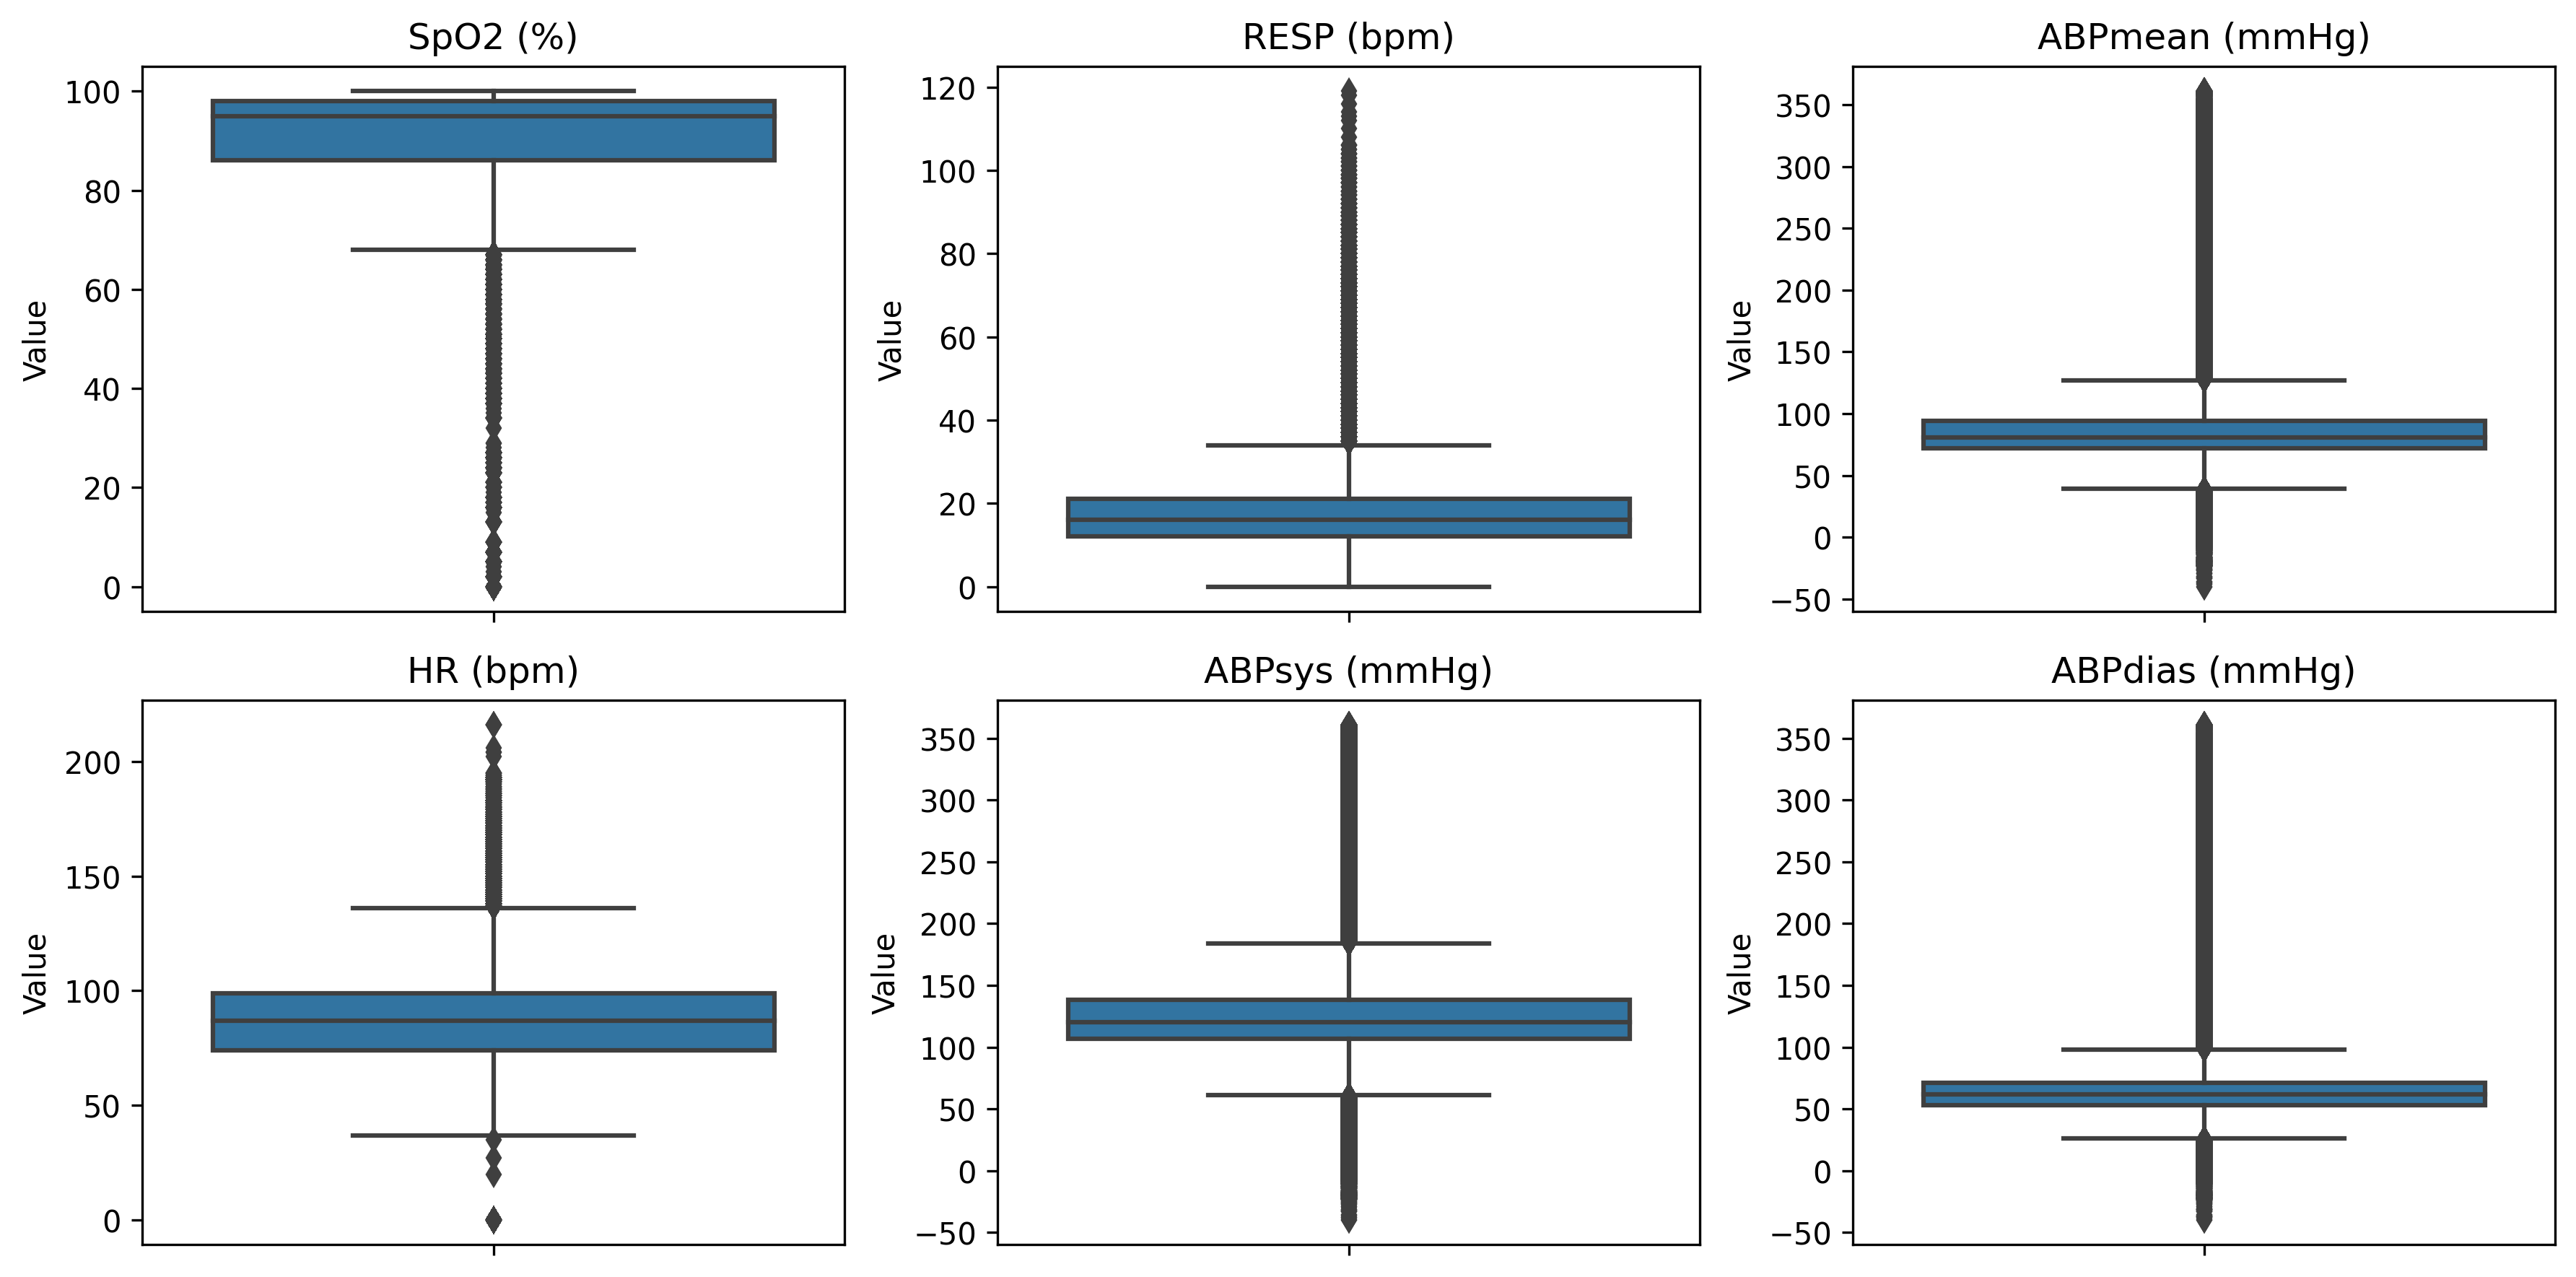

In [13]:
def plot_columns(df):
    import seaborn as sns
    df = df.copy()
    df = df.drop("record_index", axis=1)
    df = df.drop("record", axis=1)
    df = df.dropna()
    print(df.columns)
    num_rows = 2
    num_cols = 3

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6), dpi=300)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop through each column and create a violin plot
    for i, column in enumerate(df.columns):
        ax = axes[i]
        sns.boxplot(data=df, y=column, ax=ax)
        ax.set_title(column)
#         ax.set_xlabel(column)
        ax.set_ylabel('Value')

    # Hide any remaining empty subplots
    for i in range(len(df.columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()
    
plot_columns(all_df)

In [14]:
all_df.to_csv(fp_downsampled_concatenated_file, index=False)

In [15]:
all_df.describe()

,record_index,SpO2 (%),RESP (bpm),ABPmean (mmHg),HR (bpm),ABPsys (mmHg),ABPdias (mmHg)
count,7.207482e+06,6.812051e+06,6.497795e+06,6.320376e+06,7.135349e+06,6.320376e+06,6.320376e+06
mean,7.337624e+04,6.942284e+01,1.624711e+01,8.391586e+01,8.732022e+01,1.241891e+02,6.298281e+01
std,4.988713e+04,4.298076e+01,9.045125e+00,2.142368e+01,1.927226e+01,2.935350e+01,1.913398e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,-4.000000e+01,-4.000000e+01
25%,3.213200e+04,0.000000e+00,1.200000e+01,7.300000e+01,7.500000e+01,1.070000e+02,5.300000e+01
50%,6.601600e+04,9.500000e+01,1.600000e+01,8.100000e+01,8.800000e+01,1.200000e+02,6.100000e+01
75%,1.084060e+05,9.800000e+01,2.100000e+01,9.300000e+01,9.800000e+01,1.380000e+02,7.000000e+01
max,2.414050e+05,1.000000e+02,1.190000e+02,3.610000e+02,2.260000e+02,3.610000e+02,3.610000e+02


In [16]:
def standardise_data(df, train_records, valid_records, test_records, predictors):
    from sklearn.preprocessing import StandardScaler
    df_train, df_valid, df_test = (
        df[df["record"].isin(train_records)], df[df["record"].isin(valid_records)],
        df[df["record"].isin(test_records)]
    )
    scaler = StandardScaler()
    scaler.fit(df_train[predictors])
    df_train[predictors] = scaler.transform(df_train[predictors])
    df_valid[predictors] = scaler.transform(df_valid[predictors])
    df_test[predictors] = scaler.transform(df_test[predictors])
    
    return pd.concat([df_train, df_valid, df_test]), scaler

all_df, scaler = standardise_data(all_df, train_records, valid_records, test_records, list(feat_set))
all_df.head()

C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3431272954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[predictors] = scaler.transform(df_train[predictors])
C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3431272954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid[predictors] = scaler.transform(df_valid[predictors])
C:\Users\WLR\AppData\Local\Temp\ipykernel_25220\3431272954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,record_index,SpO2 (%),RESP (bpm),ABPmean (mmHg),HR (bpm),ABPsys (mmHg),ABPdias (mmHg),record
0,0,0.599459,-1.733973,1.116525,-0.100102,1.020324,1.336039,048n
1,1,0.599459,-1.733973,1.161160,-0.100102,1.083610,1.386833,048n
2,2,0.599459,-1.733973,1.161160,-0.100102,1.083610,1.386833,048n
3,3,0.599459,-1.733973,1.250430,-0.100102,1.146895,1.488420,048n
4,4,0.599459,-1.733973,1.250430,-0.100102,1.178538,1.488420,048n


In [17]:
all_df.shape

(7207482, 8)

In [18]:
def save_scaler(scaler, fp_downsampled_scaler_file):
    import pickle 
    with open(fp_downsampled_scaler_file, 'wb') as handle:
        pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)
save_scaler(scaler, fp_downsampled_scaler_file)

In [19]:
all_df[all_df["record"]=='052n'].shape[0]/60

1283.9666666666667

In [20]:
all_df["record"].unique()

array(['048n', '052n', '054n', '211n', '214n', '216n', '220n', '221n',
       '226n', '230n', '232n', '235n', '237n', '241n', '242n', '243n',
       '245n', '259n', '260n', '267n', '268n', '269n', '293n', '401n',
       '403n', '409n', '414n', '415n', '417n', '418n', '427n', '442n',
       '449n', '455n', '457n', '464n', '471n', '472n', '474n', '476n',
       '212n', '231n', '253n', '413n', '466n', '467n', '055n', '213n',
       '240n', '248n', '252n', '254n', '264n', '271n', '291n', '408n',
       '465n'], dtype=object)

## Downsample Time Series Data

In [21]:
def downsample_all_df(all_df, feat_set, window=60):
    all_downsampled_df_list = []
    feat_set = list(feat_set)
    for record, record_df in all_df.groupby("record"):
        window_groups = record_df.groupby((record_df.index//window).astype('i'))
        # Downsample with mean
        downsampled_df = window_groups[feat_set].mean()
        downsampled_df.columns = [col + "_mean" for col in feat_set]
        # Downsample with std
        std_cols = [col + "_std" for col in feat_set]
        downsampled_df[std_cols] = window_groups[feat_set].std()
        downsampled_df["record"] = record
        # Get record df index
        downsampled_df = downsampled_df.reset_index(drop=True)
        downsampled_df["record_index"] = downsampled_df.index
        all_downsampled_df_list.append(downsampled_df)
    all_downsampled_df = pd.concat(all_downsampled_df_list)
    return all_downsampled_df
downsampled_df = downsample_all_df(all_df, feat_set, window=60)
downsampled_df.head(10)

,SpO2 (%)_mean,RESP (bpm)_mean,ABPmean (mmHg)_mean,HR (bpm)_mean,ABPsys (mmHg)_mean,ABPdias (mmHg)_mean,SpO2 (%)_std,RESP (bpm)_std,ABPmean (mmHg)_std,HR (bpm)_std,ABPsys (mmHg)_std,ABPdias (mmHg)_std,record,record_index
0,0.582678,-1.733973,-0.008276,-1.216730,-0.198451,0.239745,0.017265,0.0,1.783085,1.963362,1.844639,1.634416,048n,0
1,0.517948,-1.733973,0.046774,-0.183695,0.013556,0.030645,0.016037,0.0,0.211437,0.027990,0.325756,0.173778,048n,1
2,0.512354,-1.733973,-0.072996,-0.233851,-0.053949,-0.182688,0.013217,0.0,0.051206,0.042888,0.075383,0.050965,048n,2
3,0.507159,-1.733973,0.172496,-0.155537,0.158585,0.057735,0.015179,0.0,0.190937,0.049014,0.136551,0.251661,048n,3
4,0.249438,-1.733973,1.089744,0.015169,0.942799,1.187045,0.781539,0.0,0.104015,0.081612,0.130327,0.126809,048n,4
5,0.593466,-1.733973,1.065938,-0.016509,0.992900,1.169267,0.010469,0.0,0.156026,0.078545,0.167587,0.135551,048n,5
6,0.606252,-1.733973,1.234807,-0.034107,1.069370,1.308949,0.010894,0.0,0.111421,0.054664,0.136310,0.081777,048n,6
7,0.556306,-1.733973,1.949710,0.331063,1.718048,2.085244,0.035532,0.0,0.249624,0.149381,0.279973,0.255534,048n,7
8,0.446425,-1.733973,1.728023,0.279147,1.518698,1.951488,0.286232,0.0,0.357108,0.049078,0.312305,0.401487,048n,8
9,-0.154125,-1.733973,1.056268,0.132199,0.812009,1.243764,0.955974,0.0,0.136731,0.069554,0.162112,0.128053,048n,9


In [22]:
downsampled_df.shape

(120179, 14)

In [23]:
downsampled_df[downsampled_df["record"]=='052n']

,SpO2 (%)_mean,RESP (bpm)_mean,ABPmean (mmHg)_mean,HR (bpm)_mean,ABPsys (mmHg)_mean,ABPdias (mmHg)_mean,SpO2 (%)_std,RESP (bpm)_std,ABPmean (mmHg)_std,HR (bpm)_std,ABPsys (mmHg)_std,ABPdias (mmHg)_std,record,record_index
0,0.630854,-0.475728,0.224889,-1.864985,0.363359,-0.266376,0.011217,1.103684,2.124014,2.162159,2.312199,1.572789,052n,0
1,0.623433,0.308316,1.316638,-0.198654,1.561416,0.713818,0.000000,0.055234,0.037201,0.054527,0.023808,0.044483,052n,1
2,0.623433,0.288131,1.286881,-0.220652,1.550868,0.708739,0.000000,0.088279,0.068997,0.104282,0.037470,0.067324,052n,2
3,0.623433,0.277122,1.344907,-0.184575,1.586203,0.756993,0.000000,0.083249,0.044325,0.031045,0.031423,0.043059,052n,3
4,0.628228,0.825769,1.493690,-0.083383,1.613627,0.962707,0.018092,0.430776,0.311787,0.130229,0.159296,0.327158,052n,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,0.625831,0.554198,0.279620,-0.588462,0.977606,-0.207238,0.007253,0.136116,0.084058,0.104523,0.055827,0.071278,052n,1280
1281,0.627029,0.227578,0.202996,-0.731010,0.947018,-0.272423,0.008633,0.132134,0.041472,0.055351,0.027630,0.050071,052n,1281
1282,0.622235,0.521169,0.290035,-0.712531,1.000284,-0.208084,0.011188,0.202188,0.096711,0.145872,0.057957,0.086321,052n,1282
1283,0.621036,0.196384,0.220850,-0.773246,0.967586,-0.269037,0.015098,0.146826,0.034736,0.076924,0.025171,0.025094,052n,1283


In [24]:
downsampled_df.to_csv(fp_downsampled_continuous_file, index=False)

## Flatten Data and Generate Data for Training

In [25]:
# Update feat set
downsampled_feat_set = [f"{feat}_mean" for feat in feat_set] + [f"{feat}_std" for feat in feat_set] 
print(downsampled_feat_set)

['SpO2 (%)_mean', 'RESP (bpm)_mean', 'ABPmean (mmHg)_mean', 'HR (bpm)_mean', 'ABPsys (mmHg)_mean', 'ABPdias (mmHg)_mean', 'SpO2 (%)_std', 'RESP (bpm)_std', 'ABPmean (mmHg)_std', 'HR (bpm)_std', 'ABPsys (mmHg)_std', 'ABPdias (mmHg)_std']


In [26]:
pred_cols = [f"{feat}_mean" for feat in feat_set]
print(pred_cols)

['SpO2 (%)_mean', 'RESP (bpm)_mean', 'ABPmean (mmHg)_mean', 'HR (bpm)_mean', 'ABPsys (mmHg)_mean', 'ABPdias (mmHg)_mean']


In [27]:
def generate_data_for_training(
    downsampled_df, downsampled_feat_set, input_mins, prediction_mins, pred_cols):
    data = []
    downsampled_feat_set = list(downsampled_feat_set)
    # The flattened features for past input_days
    new_feat_set = [feat + " Min" + str(i) for i in range(input_mins) for feat in downsampled_feat_set] + \
        [feat + " PredMin" + str(i) for i in prediction_mins for feat in pred_cols] + \
        ["target_index"] + ["input_start_index"] + ["input_end_index"] + ["record"]

    # Sort prediction mins e.g. 1, 3, 2 -> 1, 2, 3
    prediction_mins.sort() 
    # For each record
    record_groups = downsampled_df.groupby("record")
    for record, record_df in tqdm(record_groups):
        record_df = record_df.set_index("record_index")
        # Go through possible end_input indices
        for end_input in record_df.index:
            # Not enough input information
            if end_input < input_mins-1:
                continue
            # Not enough pred information
            elif end_input + prediction_mins[-1] > record_df.index[-1]:
                break
            start_input = end_input - input_mins + 1
            # (input) 0 1 2 3 4, (output) 5, 6, 7
            pred_indices = [end_input + pred_min for pred_min in prediction_mins]
            # Get the rows we are predicting
            pred_rows = record_df[pred_cols].loc[pred_indices]
            # Get rows we are using to predict
            input_rows = record_df[downsampled_feat_set].loc[start_input:end_input]
            
            # Get input
            feat_list = list(input_rows.values.flatten())
            # Get prediction
            pred_list = list(pred_rows.values.flatten())
            
            # Add row
            new_row = (
                feat_list + pred_list +
                [pred_rows.index.tolist(), start_input, end_input, record]
            )
            data.append(new_row)
    return pd.DataFrame(data, columns=new_feat_set)

flattened_df = generate_data_for_training(
    downsampled_df, downsampled_feat_set, input_mins=5, prediction_mins=[1, 2, 3], pred_cols=pred_cols)
flattened_df.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [05:00<00:00,  5.26s/it]


,SpO2 (%)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,HR (bpm)_mean Min0,ABPsys (mmHg)_mean Min0,ABPdias (mmHg)_mean Min0,SpO2 (%)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,HR (bpm)_std Min0,...,SpO2 (%)_mean PredMin3,RESP (bpm)_mean PredMin3,ABPmean (mmHg)_mean PredMin3,HR (bpm)_mean PredMin3,ABPsys (mmHg)_mean PredMin3,ABPdias (mmHg)_mean PredMin3,target_index,input_start_index,input_end_index,record
0,0.582678,-1.733973,-0.008276,-1.216730,-0.198451,0.239745,0.017265,0.0,1.783085,1.963362,...,0.556306,-1.733973,1.949710,0.331063,1.718048,2.085244,"[5, 6, 7]",0,4,048n
1,0.517948,-1.733973,0.046774,-0.183695,0.013556,0.030645,0.016037,0.0,0.211437,0.027990,...,0.446425,-1.733973,1.728023,0.279147,1.518698,1.951488,"[6, 7, 8]",1,5,048n
2,0.512354,-1.733973,-0.072996,-0.233851,-0.053949,-0.182688,0.013217,0.0,0.051206,0.042888,...,-0.154125,-1.733973,1.056268,0.132199,0.812009,1.243764,"[7, 8, 9]",2,6,048n
3,0.507159,-1.733973,0.172496,-0.155537,0.158585,0.057735,0.015179,0.0,0.190937,0.049014,...,0.169125,-1.733973,1.094207,0.073244,0.713916,1.323341,"[8, 9, 10]",3,7,048n
4,0.249438,-1.733973,1.089744,0.015169,0.942799,1.187045,0.781539,0.0,0.104015,0.081612,...,-0.009481,-1.733973,0.819702,0.020448,0.589455,0.933924,"[9, 10, 11]",4,8,048n


In [28]:
flattened_df.shape

(119780, 82)

## Remove Rows With NaN Values

In [29]:
flattened_df = flattened_df.dropna()
flattened_df.head()

,SpO2 (%)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,HR (bpm)_mean Min0,ABPsys (mmHg)_mean Min0,ABPdias (mmHg)_mean Min0,SpO2 (%)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,HR (bpm)_std Min0,...,SpO2 (%)_mean PredMin3,RESP (bpm)_mean PredMin3,ABPmean (mmHg)_mean PredMin3,HR (bpm)_mean PredMin3,ABPsys (mmHg)_mean PredMin3,ABPdias (mmHg)_mean PredMin3,target_index,input_start_index,input_end_index,record
0,0.582678,-1.733973,-0.008276,-1.216730,-0.198451,0.239745,0.017265,0.0,1.783085,1.963362,...,0.556306,-1.733973,1.949710,0.331063,1.718048,2.085244,"[5, 6, 7]",0,4,048n
1,0.517948,-1.733973,0.046774,-0.183695,0.013556,0.030645,0.016037,0.0,0.211437,0.027990,...,0.446425,-1.733973,1.728023,0.279147,1.518698,1.951488,"[6, 7, 8]",1,5,048n
2,0.512354,-1.733973,-0.072996,-0.233851,-0.053949,-0.182688,0.013217,0.0,0.051206,0.042888,...,-0.154125,-1.733973,1.056268,0.132199,0.812009,1.243764,"[7, 8, 9]",2,6,048n
3,0.507159,-1.733973,0.172496,-0.155537,0.158585,0.057735,0.015179,0.0,0.190937,0.049014,...,0.169125,-1.733973,1.094207,0.073244,0.713916,1.323341,"[8, 9, 10]",3,7,048n
4,0.249438,-1.733973,1.089744,0.015169,0.942799,1.187045,0.781539,0.0,0.104015,0.081612,...,-0.009481,-1.733973,0.819702,0.020448,0.589455,0.933924,"[9, 10, 11]",4,8,048n


In [30]:
flattened_df.shape

(94758, 82)

<Axes: >

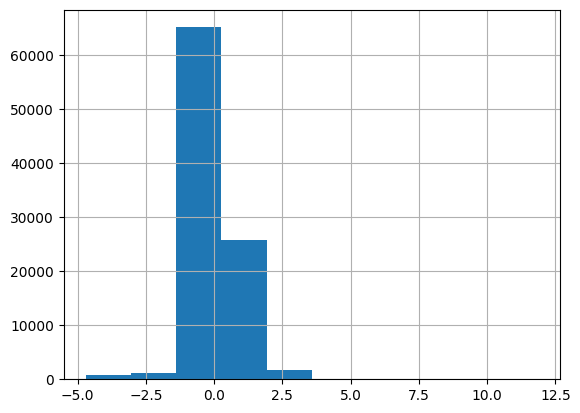

In [31]:
flattened_df["ABPmean (mmHg)_mean PredMin1"].hist()

In [32]:
def label_train_valid_test_samples(df, train_records, valid_records, test_records):
    df = df.copy()
    df["train"] = df["record"].isin(train_records)
    df["valid"] = df["record"].isin(valid_records)
    df["test"] = df["record"].isin(test_records)
    return df

train_valid_test_labelled_df = label_train_valid_test_samples(flattened_df, train_records, valid_records, test_records)
train_valid_test_labelled_df.head()

,SpO2 (%)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,HR (bpm)_mean Min0,ABPsys (mmHg)_mean Min0,ABPdias (mmHg)_mean Min0,SpO2 (%)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,HR (bpm)_std Min0,...,HR (bpm)_mean PredMin3,ABPsys (mmHg)_mean PredMin3,ABPdias (mmHg)_mean PredMin3,target_index,input_start_index,input_end_index,record,train,valid,test
0,0.582678,-1.733973,-0.008276,-1.216730,-0.198451,0.239745,0.017265,0.0,1.783085,1.963362,...,0.331063,1.718048,2.085244,"[5, 6, 7]",0,4,048n,True,False,False
1,0.517948,-1.733973,0.046774,-0.183695,0.013556,0.030645,0.016037,0.0,0.211437,0.027990,...,0.279147,1.518698,1.951488,"[6, 7, 8]",1,5,048n,True,False,False
2,0.512354,-1.733973,-0.072996,-0.233851,-0.053949,-0.182688,0.013217,0.0,0.051206,0.042888,...,0.132199,0.812009,1.243764,"[7, 8, 9]",2,6,048n,True,False,False
3,0.507159,-1.733973,0.172496,-0.155537,0.158585,0.057735,0.015179,0.0,0.190937,0.049014,...,0.073244,0.713916,1.323341,"[8, 9, 10]",3,7,048n,True,False,False
4,0.249438,-1.733973,1.089744,0.015169,0.942799,1.187045,0.781539,0.0,0.104015,0.081612,...,0.020448,0.589455,0.933924,"[9, 10, 11]",4,8,048n,True,False,False


In [33]:
train_valid_test_labelled_df.to_csv(fp_downsampled_dropna_file)